In [13]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [14]:
IMAGE_SIZE=[224,224]

In [15]:
train_path='Datasets/TRAIN'
valid_path='Datasets/TEST'

In [16]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [17]:
# we do not need to train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [18]:
# to get no of classes
folders = glob('Datasets/TRAIN/*')

In [19]:
x = Flatten()(resnet.output)
x = Dense(1000, activation='relu')(x)


In [20]:
pred=Dense(len(folders), activation='softmax')(x)

In [22]:
'''prev_'''
model = Model(inputs=resnet.input, outputs=pred)
#model=Sequential()
#model.add(prev_model)
#model.add(Dropout(0.3))

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [24]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [25]:
# To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=6)

In [26]:
# We will reduce the learning rate when then accuracy not increase for 2 steps
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [27]:
callbacks = [earlystop, learning_rate_reduction]

In [28]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [29]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [30]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [31]:
# since I have 12 images only, batch size =12
training_set=train_datagen.flow_from_directory('Datasets/TRAIN',
                                              target_size=(224,224),
                                              batch_size=12,
                                              class_mode='categorical')

Found 24 images belonging to 2 classes.


In [32]:
test_set=test_datagen.flow_from_directory('Datasets/TEST',
                                         target_size=(224,224),
                                         batch_size=12,
                                         class_mode='categorical')

Found 24 images belonging to 2 classes.


In [33]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=7,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    callbacks=callbacks
)

Epoch 1/7
2/2 [==============================] - 11s 5s/step - loss: 31.8530 - accuracy: 0.5000 - val_loss: 15.4740 - val_accuracy: 0.5000
Epoch 2/7
2/2 [==============================] - 6s 4s/step - loss: 15.8478 - accuracy: 0.5000 - val_loss: 11.3974 - val_accuracy: 0.5000
Epoch 3/7
2/2 [==============================] - 6s 4s/step - loss: 7.8824 - accuracy: 0.5000 - val_loss: 3.9236 - val_accuracy: 0.5000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/7
2/2 [==============================] - 6s 4s/step - loss: 4.8836 - accuracy: 0.5000 - val_loss: 5.1235 - val_accuracy: 0.5000
Epoch 5/7
2/2 [==============================] - 6s 4s/step - loss: 4.0893 - accuracy: 0.5000 - val_loss: 0.8974 - val_accuracy: 0.5417
Epoch 6/7
2/2 [==============================] - 6s 4s/step - loss: 1.6532 - accuracy: 0.5417 - val_loss: 4.0340 - val_accuracy: 0.5000
Epoch 7/7
2/2 [==============================] - 6s 4s/step - loss: 3.6892 - accuracy: 0.5000 - va

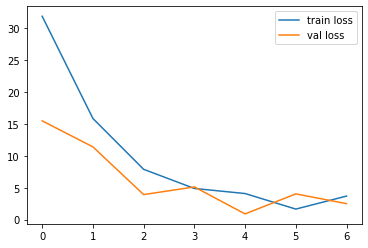

<Figure size 432x288 with 0 Axes>

In [34]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


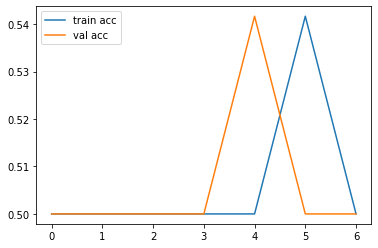

<Figure size 432x288 with 0 Axes>

In [35]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXoAAAD4CAYAAADiry33AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAAAxzUlEQVR4nO3deXCc93ng+e/TjfsGGrwBsButwyTFS7wASIQ8kQ8pM0O74iiyK8lEro29W2tHyabiXcqbsjV2bVUmdmZmU1F2S1E8I288lj3yeGJlFXvsHUmgAkAiKJGUqJONBkjwBBoHcRBn//aPt18IBAGigT7efl8+nyoU0O/5NCQ+ePt5f+/zE2MMSimlvMvndABKKaUySxO9Ukp5nCZ6pZTyOE30SinlcZrolVLK4/KcDmCx2tpaEwwGnQ5DKaVc5cSJEwPGmHVLrcu5RB8MBunq6nI6DKWUchUR6V1unZZulFLK4zTRK6WUx2miV0opj8u5Gv1SZmZm6OvrY3Jy0ulQXKeoqIi6ujry8/OdDkUp5RBXJPq+vj7Ky8sJBoOIiNPhuIYxhlgsRl9fH6FQyOlwlFIOcUXpZnJykkAgoEl+lUSEQCCgn4SUus25ItEDmuTXSH9vSinXJHqlVJrE43DiWZgedzqSlA2MTfH3Jy84HUbO00SfhOHhYf76r/96Tfv++q//OsPDw+kNSKlU9LTBC4/Dyf/kdCQp+5tj3fzhcyeJDrj/j1YmaaJPwq0S/ezs7C33ffHFF6mqqspAVEqtUbTtxu8u1hGJ3fBdLU0TfRKOHj1KJBJhz549fO1rX+Pll1/m8OHDHDlyhO3btwPw2c9+ln379rFjxw6efvrp+X2DwSADAwP09PSwbds2vvSlL7Fjxw4+9alPcf369ZvO9cILL3Do0CH27t3LJz7xCa5cuQLA2NgYX/ziF9m5cye7du3iJz/5CQA///nPuffee9m9ezcPPvhgFn4byvXsBN9zzCrjuNTIxAxvXxgBoD0y4HA0uc0VwysX+tcvnOGdi9fSesztmyv45r/csez6P/uzP+Ptt9/m5MmTALz88su88cYbvP322/PDFr/3ve9RU1PD9evXOXDgAJ/73OcIBAI3HOfDDz/khz/8IX/zN3/Db/3Wb/GTn/yE3/md37lhm/vvv5/Ozk5EhGeeeYY///M/5y/+4i/49re/TWVlJW+99RYAQ0ND9Pf386UvfYm2tjZCoRCDg4Np/K0oT5oahQtvQHUQhnrgytuwaZfTUa3Ja9EYcQMNNSV0dscwxujgg2XoFf0aHTx48Iax6X/5l3/J7t27aWpq4vz583z44Yc37RMKhdizZw8A+/bto6en56Zt+vr6+PSnP83OnTv5zne+w5kzZwD41a9+xVe+8pX57aqrq+ns7KS1tXU+jpqamjS+Q+VJvR1g5uCBo9brnmPOxpOCju4YRfk+vtzayMDYNB9eHXM6pJyV1BW9iDwE/J+AH3jGGPNni9Y/BnwHsG9//5Ux5pkF6yuAd4D/aoz5aioB3+rKO5tKS0vnf3755Zf51a9+RUdHByUlJXz84x9fcux6YWHh/M9+v3/J0s0f/MEf8Md//MccOXKEl19+mSeffDIj8avbVPQV8BfAjs9C23esMk7zV1bcLRd1RGLs31rDA3dZnXnbzw5w14Zyh6PKTSte0YuIH3gKeBjYDnxBRLYvsemPjDF7El/PLFr3bcC1d37Ky8sZHR1ddv3IyAjV1dWUlJTw3nvv0dnZueZzjYyMsGXLFgCeffbZ+eWf/OQneeqpp+ZfDw0N0dTURFtbG9FoFEBLN2pl0TaoPwT5xRBqhZ5/grlbDyjIRQNjU7x3eZTmcID6mhLqa4pp1xuyy0qmdHMQOGuM6TbGTAPPAZ9J9gQisg/YAPy3tYXovEAgwH333cc999zD1772tZvWP/TQQ8zOzrJt2zaOHj1KU1PTms/15JNP8sgjj7Bv3z5qa2vnl//pn/4pQ0ND3HPPPezevZuXXnqJdevW8fTTT/Mbv/Eb7N69m0cffXTN51W3gYlBuPyWleDB+j49CpdOOhrWWnR2W0m9JWzdB2tprKWzO8Zc3DgZVu4yxtzyC/hNrHKN/fp3sUozC7d5DLgEnAaeB+oTy33Ay0BdYpu/WuYcXwa6gK6Ghgaz2DvvvHPTMpU8/f0pY4wx7/zMmG9WGNPTbr0evWq9bvsLZ+Nag6//l9Nmxzd+bmZm54wxxvz0jT6z9X/7B/NW37DDkTkH6DLL5PF03Yx9AQgaY3YBvwTsmsP/DLxojOm71c7GmKeNMfuNMfvXrVtyJiylVKqibZBfAlv2Wa/L1sH67a4cT98RiXEwVEOe30phzYkrex1mubRkEv0FoH7B6zo+uukKgDEmZoyZSrx8Bkj8n0Qz8FUR6QG+C/wrEbnhRq5SKkuibdDQDHkFHy0LtcK5TpidWn6/HHN5ZJLugfH5sg3AhooiwutKtU6/jGQS/XHgThEJiUgB8HngZws3EJFNC14eAd4FMMb8tjGmwRgTBP4E+L4x5mhaIldKJW/sKvS/91F93hZqhdnrcOGEM3GtQUe3ddXeHL7xOZWWcC3Ho4PMzLn3IbBMWTHRG2Nmga8Cv8BK4D82xpwRkW+JyJHEZo+LyBkROQU8jlWPV0rlCrs8Ezp84/KtLYC4qnzTfjZGVUk+2zZW3LC8ORxgfHqO030jDkWWu5IaR2+MeRF4cdGybyz4+QngiRWO8R+B/7jqCJVSqYu2QWElbNx94/Liati021r/cXd82G6PxGgKBfD5bnwKtqnRusLviAywb2u1E6HlLH0yVqnbQc8xCN4H/iWu7UKt0HccpieyH9cqnR+c4MLwdVruCNy0rqa0gG2bKujo1jr9YproM6SsrMzpEJSyDJ+HwW4IHl56fagV5qbh/GvZjWsN7FE1zY03J3p7eVfPEJMzc9kMK+dpolfK6+x+NotvxNoamsCX54o6fXskRm1ZIXesX/pCqiUcYGo2zpvnhrMbWI7TRJ+Eo0eP3tB+4Mknn+S73/0uY2NjPPjgg9x7773s3LmTv//7v1/xWMu1M16q3fByrYmVWpXoMSgJWGPml1JYbo2tz/EGZ8YYOiIxWsLLzx99sLEGn6Dlm0Vc16aYfzxqPcadTht3wsPLD+9/9NFH+aM/+qP57pE//vGP+cUvfkFRURE//elPqaioYGBggKamJo4cOXLLVqlLtTOOx+NLthteqjWxUqtijHWlHrwffLe4rgsehlf/HUxeg6KK5bdzUKR/nKujUzcNq1yooiifnVsq6YgMwCfvymJ0uU2v6JOwd+9erl69ysWLFzl16hTV1dXU19djjOHrX/86u3bt4hOf+AQXLlyYnyhkOUu1M16u3fBSrYmVWpXBbrjWt3zZxhZqtdoXn+vITlxr0JGoz7fcItEDNIdrefPcMBPT7mvWlinuu6K/xZV3Jj3yyCM8//zzXL58eb552A9+8AP6+/s5ceIE+fn5BIPBJdsT25JtZ6xU2syPn3/g1tvVHwR/obX9XZ/OfFxr0B6JsaWqmIaakltu1xIO8H+/EuF4z9B8C+PbnV7RJ+nRRx/lueee4/nnn+eRRx4BrJbC69evJz8/n5deeone3t5bHmO5dsbLtRteqjWxUqvScwzKN0Hgjltvl19sJfscvSEbjxs6u2M036I+b9sfrCbfLzqP7AKa6JO0Y8cORkdH2bJlC5s2WR0ffvu3f5uuri527tzJ97//fT72sY/d8hjLtTNert3wUq2JlUrafH3+MCQzxV6o1br/NZF78xq8d3mUoYmZZYdVLlRSkMee+qr5Uo9yY+nGQfZNUVttbS0dHUvXNMfGbp7WrLCwkH/8x39ccvuHH36Yhx9++IZlZWVlN0w+otSq9L8H4/0r1+dtoVZ46f+Anldh+5GVt8+i+fHzK9Tnbc3hWv7qv3/ItckZKoryMxmaK+gVvVJeFV1h/Pxim++F/NKcHGbZ2R0jVFvK5qripLZvCQeIG3i9O/c+nThBE71SXhV9BaoaoHprctvnFVgPT+VYnX52Ls5r3YPzvWySsbehisI8n7YtTnBNorcmUFGrpb+321Q8bpVgkr2at4VarZLP6K2HCWfT2xevMTo1u+KwyoUK8/zsD1brRCQJrkj0RUVFxGIxTVqrZIwhFotRVFTkdCgq2668BZPDKw+rXMz+w5BD5Rt79MxqrujB6k//3uVRBsenMxGWq7jiZmxdXR19fX309/c7HYrrFBUVUVdX53QYKtvs8styjcyWs2m31c442gY7fzP9ca1Be2SAuzaUsa68cFX72X8YOrtj/PrOTSts7W2uSPT5+fnzT40qpZIQbYPAnVCxygTn81vtjHOkTj89G6erZ4hHD9SvvPEiu+oqKS3w0x4ZuO0TvStKN0qpVZibgd721dfnbaFWGIpa7Y0ddqpvmOszc0kPq1wo3+/jYKhGb8iiiV4p77l4EqbHbp42MFl2uScH6vTtZ2OIQFNo9YkerDp9d/84V67d3q1GNNEr5TXRV6zvq63P29Zvt9oa50D5pj0ywI7NFVSWrO2hJ/uTwO3eDkETvVJeE22DDfdAae3a9vf5rD8S0TarjYJDJmfmePPcMC3hNb4PYNumCiqL82/7YZaa6JXyktkpa0rAtdbnbaFWuHbBanPskBO9Q0zPxddUn7f5fUJTY81tPxGJJnqlvKTvOMxOrr1sY7P/UDhYvmmPDOD3CQeCNSkdp7kxwPnB65wfzP3JzzNFE71SXhJtA/HB1pbUjhO4w2pv7Giij7G7rpKywtRGgbfcYZV+buc6vSZ6pbwkegw27YHiqtSOI2Jd1fccc6ROPzY1y+m+kZTq87Y715dRW1ZwW5dvNNEr5RXT41bpZq3DKhcLHrbaHPe/l57jrcLx6CBzcZNSfd4mIjQ1BmiPDNy2bVQ00SvlFec6IT6T+o1Ym4N1+vbIAAV+H/u2pmee5JZwLVeuTdE9MJ6W47mNJnqlvKLnGPjyoKE5Pcer3gpVWx1J9B3dMe7dWkVRvj8tx2u5zcfTa6JXyiuibbBlPxSUpu+YocNWu+P4XPqOuYLhiWnOXLxGc2Pq9Xnb1kAJmyqLNNErpVxscgQuvpm+so0t9IDV7vjyWytumi6d3YMYAy13pF6ft4kIzeEAHd0x4vHbr06viV4pL+htBxNPf6K3x+NnsXzTERmgON/P7rqqtB63JVzL4Pg0718ZTetx3UATvVJeED0G/kKoO5De41ZsstodZ7HBWUd3jP3Bagry0puebue+N5rolfKCaBs0HIL8DMwmFmq1PjHMzaT/2Iv0j07xwZWxtIyfX2xLVTFbAyW3ZdtiTfRKud14zJo6MN1lG1uo1Wp7fPHNzBx/AfuhptXMD7saLeEAr0VjzN1mdXpN9Eq5Xe+r1vfVzg+brCzW6TsiMcqL8tixuSIjx28O1zI6OcuZiyMZOX6u0kSvlNtF2yC/FDbvzczxSwNW2+OsJPoBDoVqyPNnJjU1NVoN0m638o0meqXcLtpmNTHzr21yjqSEWq32x7NTGTvFxeHr9MQmaM5Afd62vryIO9eXaaJXSrnI6GUY+CBz9XlbqNVqf9x3PGOnsEfDZKo+b2sJB+jqGWR6Np7R8+QSTfRKuVk0MewxXY3MlrO1xWp/nMHyTXskRnVJPndvKM/YOcAaZjkxPcfpvuGMnieXJJXoReQhEXlfRM6KyNEl1j8mIv0icjLx9fuJ5VtF5I3EsjMi8j+l+w0odVuLvgJFlbBxV2bPU1RptT/OUKI3xtARGaA5HMDnk4ycw3YoFEDk9qrTr5joRcQPPAU8DGwHviAi25fY9EfGmD2Jr2cSyy4BzcaYPcAh4KiIbE5P6Eopeo5Zo2J86Wn+dUuhVujrstohp9m5wQkujkxmtD5vqy4tYPumittqHtlkrugPAmeNMd3GmGngOeAzyRzcGDNtjLHv3hQmeT6lVDKGemGoJ/VpA5MVOmy1QT7XmfZD21fXzY2Zrc/bWsIB3jg3zORM9pq1OSmZxLsFOL/gdV9i2WKfE5HTIvK8iNTbC0WkXkROJ47xb4wxF1OKWCllsdsSZPpGrK2h2WqDnIHyTXskxvryQsLr0th58xaawwGmZ+O80TuUlfM5LV1X2C8AQWPMLuCXwLP2CmPM+cTyO4DfE5ENi3cWkS+LSJeIdPX396cpJKU8LtoGJbWwflt2zldQavXSSXOit+rzMVrCAUQyW5+3HQjW4PfJbVOnTybRXwDqF7yuSyybZ4yJLSjRPAPsW3yQxJX828BNnzONMU8bY/YbY/avW7cu2diVun0ZY424CbVa87tmS6gVLp202iKnydmrYwyMTWWkv81yyovy2VVXedvMI5tMoj8O3CkiIREpAD4P/GzhBiKyacHLI8C7ieV1IlKc+LkauB94Px2BK3Vbi0Vg9GLmh1UuFjxstUPubU/bIefr8xkeP79Yc2OAU+eHGZuazep5nbBiojfGzAJfBX6BlcB/bIw5IyLfEpEjic0eTwyfPAU8DjyWWL4NeC2x/BXgu8aY7M1goJRXRV+xvmeqv81y6g5AXlFayzftkQHqqouprylJ2zGT0RKuZTZuON4zmNXzOiEvmY2MMS8CLy5a9o0FPz8BPLHEfr8EMjzAV6nbUM8xqNgCNY3ZPW9+EdQf+uhBrRTF44bO7kE+veOmW3cZt29rNQV+H52RGP/s7vVZP3826XBHpdwmHrcSbfBwduvzttBhqy3yeOr17XcuXWPk+kzWyzYAxQV+9jRU3RY3ZDXRK+U2/e/CxED2hlUuZpeL0jDrVMf8+Pns3YhdqCUc4O2LI4xMZH5SFSdpolfKbbLV32Y5m/dCQVl6En13jMZ1pWyszMDMWEloCddiDHRGvX1Vr4leKbeJtkF1EKoanDm/P996eCrFG7Izc3Fe645l7WnYpeyur6Qo3+f5eWQ10SvlJvE56HnVubKNLdRqtUe+dmnNh3jrwgjj03NZHT+/WGGenwPBGk30Sqkccvk0TI1kf1jlYvYfmp5X13wIO7nasz45pTkc4P0rowyMZW5SFadpolfKTexySfB+Z+PYuNNqXWyP51+DjkiMj20sJ1BWmMbAVs/+RNHp4adkNdEr5SbRNqi9G8o3OhuHz28N71xjnX5qdo7jPYOODKtc7J7NFZQV5nl6mKUmeqXcYm4Gejucr8/bQq0w3Gu1S16lN88NMzUbd7Q+b8vz+zgU8nadXhO9Um5x4Q2YGc+tRA9rGmbZEYnhEzgYcrY+b2sOB4gOjHNp5LrToWSEJnql3CLaBojz9Xnbuo9B6bo1lW86IjHu2VJJZXF+BgJbPbuE5NWrek30SrlF9BXYeA+U5MZVMCIf1emNSXq369NzvHl+KCfq87ZtGyuoKsn3bJ1eE71SbjAzCedfd35Y5WKhVhi9ZLVNTlJX7yAzcyYn6vM2n09obgzQEYlhVvFHyy000SvlBn2vw9xU9uaHTZZdp1/FMMv2SIw8n7B/a3WGglqb5nCAC8PXOT/ovTq9Jnql3CDaBuKHrS1OR3KjmkarXfIq6vTtkRh76qsoLUyqS3rWtCRKSe2RAYcjST9N9Eq5QfSY1UysqMLpSG4kYl3V97xqtU9ewbXJGd7qG55PqrkkvK6MdeWFnqzTa6JXKtdNjcGFLue6Va4keNhqm9z/7oqbHo8OEjfQlIOJXkRoCQfo6PZenV4TvVK57lwnxGdzZ/z8YvYfoCTKN+2RGAV5Pu5tyK36vK25MUD/6BSR/jGnQ0krTfRK5broK+DLh/ompyNZWlUDVIeSTvT7t1ZTlO/PQmCrZ48E8lr5RhO9Urmu5xjUH4SC7E6evSqhVuj5J6uN8jKGxqd599K1nKzP2+pritlSVey5B6c00SuVy64PwaVTuTescrFQq9U++dKpZTexu0Pm0oNSi4kIzYk6fTzunTq9JnqlcllvO5h47tbnbcGV6/TtkRglBX521VVlJ6Y1agkHGJ6Y4d3L15wOJW000SuVy6LHIK8Y6vY7HcmtlW+wet/cosFZR3eMg6Ea8v25nXa82Pcmt3/jSt3uom3QcAjynJ2cIynBw1Yb5dnpm1ZdvTbJ2atjjs4Pm6xNlcWEaks10SulsmB8AK6eyf2yjS3UarVRvvjGTas6EvX5XOpvcyvN4QCvRQeZnVv5ITA30ESvVK6yyyC51shsOcH7AbHKTYt0RGJUFOWxfXOOPdm7jJZwgLGpWd66MOJ0KGmhiV6pXBVtg4Jy2LTH6UiSU1JjtVFeosFZeyTGocYAfp84ENjqNSVKTB0emUdWE71SuSraZjUx8+dW869bCj1gtVOemZxf1Dc0wbnBiZweP79YbVkhd28o90ydXhO9Urno2kWInXVPfd4WarXaKfe9Pr/ITpZuqc/bmsMBjvcMMjW7/ENgbqGJXqlcZNe5c7WR2XIamq12ygvG03dEYgRKC7hrQ5mDga1eSzjA5EycU+fdX6fXRK9ULoq2QVEVbNjpdCSrU1RhtVNOJHpjDO2RGE3hACLuqM/bDoUCiHijP70meqVyUbTNupr3ufCfaKgVLpyAqTGiA+Ncvjbpqvq8rbIkn3s2V3qiwZkL/y9SyuOGemDknHuGVS4WarXaKp/rdN34+cVawgFOnhvm+rS76/Sa6JXKNXZ9O9cbmS2n/pDVVjn6Cu2RGBsriggGcrjz5i00hQNMz8U50TvkdCgp0USvVK6JtkHpelh3t9ORrE1BCdQfxETb6IzEaHFhfd52IFhDnk9cX6fXRK9ULjHGGnETarXmY3WrUCtcPs3M+GBOtyVeSVlhHrvrq1z/4JQmeqVyycCHMHbZfcMqFwseRkycQ773XJ3owZpe8HTfCKOTM06Hsmaa6JXKJXb7ALc9KLVY3X6mpJBPl3xAXbU76/O2lnCAubjheM+g06GsmSZ6pXJJzzGorLfmYHWxOV8BJ8zd3Jf3jtOhpOzerdUU5PloP+ve8k1SiV5EHhKR90XkrIgcXWL9YyLSLyInE1+/n1i+R0Q6ROSMiJwWkUfT/QaU8ox43KrPBw+7uz4PvHPxGq/ObGPTZDeM9TsdTkqK8v3sa6h2dZ1+xUQvIn7gKeBhYDvwBRHZvsSmPzLG7El8PZNYNgH8K2PMDuAh4N+LSFV6QlfKY66egeuD7i/bYD1N2h7fYb24xaxTbtEcDvDOpWsMjd88qYobJHNFfxA4a4zpNsZMA88Bn0nm4MaYD4wxHyZ+vghcBdatNVilPM2t/W2W0NEdY6J2p9Vm2QOJviUcwBh4LerOq/pkEv0W4PyC132JZYt9LlGeeV5E6hevFJGDQAEQWWLdl0WkS0S6+vvd/TFPqTWLtkFNI1TWOR1JSmbm4rweHeRQeL3VZvkWE4a7xa66KkoK/K5tW5yum7EvAEFjzC7gl8CzC1eKyCbg/wG+aIy5aW4uY8zTxpj9xpj969bpBb+6Dc3NQu8/eaJsc7pvmInpOau/TajVarc8csHpsFJSkOdjf7DGtX1vkkn0F4CFV+h1iWXzjDExY8xU4uUzwD57nYhUAP8v8L8bYzpTC1cpj7p0CqaueSLR26NTmhoDH70fj5RvPrw6xtXRyZU3zjHJJPrjwJ0iEhKRAuDzwM8WbpC4YrcdAd5NLC8Afgp83xjzfHpCVsqDelze32aBju4Y2zdVUF1aABvugeLqJeeRdRu7A2dnt/vG06+Y6I0xs8BXgV9gJfAfG2POiMi3RORIYrPHE0MoTwGPA48llv8W0Ao8tmDo5Z50vwmlXC/aBuu2Qdl6pyNJyeTMHF29Qx89DevzWZOGR1+x2ju42I7NlZQX5dHhwr43SU1GaYx5EXhx0bJvLPj5CeCJJfb7O+DvUoxRKW+bnYZznbD3d52OJGVvnBtiejZ+Y//50APw7gtW++Ua9z4I5vcJh0IBV9bp9clYpZx24QTMTHiiPt8ZieH3CQdDNR8t9Fidvjc2wYXh606Hsiqa6JVyWrQNEAje53QkKWuPxLhnSyXlRfkfLay9C8o2eGKYZcsd1icVtw2z1ESvlNOibbBpl3XT0sXGp2Y5eX745mkDRaybzNE219fp71pfTk1pgev602uiV8pJM9eh73VPlG26eoeYjZul54cNtcLYFasNs4v5fEJzY4COSAzjoj9amuiVctL512BuGoLuT/TtkQHy/cL+rTU3r7TbOthtmF2sORzg0sgkvbEJp0NJmiZ6pZwUbQPxw9ZmpyNJWUckxt76aooL/DevrA5Z7Zc9UKe3h466afSNJnqlnBRtgy37oLDc6UhSMnJ9hrcvjCw/m5SIVb7pOWa1Y3axxtpSNlQUuqpOr4leKadMjcKFNzxRn389OkjcsHR93hZqhetDVjtmFxMRWsK1dHa7p06viV4pp/R2gJnzRFvi9sgAhXk+9jRULb+R3d7BC+WbxgADY9N8eHXM6VCSooleKadEXwF/AdQfcjqSlHVEYhwI1lCYt0R93la5BWrC3kj0dp3+rDvKN5rolXJKzzEryecXOx1JSmJjU7x3eXT5+vxCoVbobbfaMrtYfU0J9TXFrpleUBO9Uk6YGIRLpz3RrdLu5phcoj9stWO+dCrDUWVec2OAzu5B5uK5X6fXRK+UE3r/CTCeuBHbHhmgrDCPXVsqV9446J3x9C3hWkauz/DupWtOh7IiTfRKOSF6DPJLrKGVLtfRHeNgqIY8fxLppGw9rN/uiQZnH42nz/06vSZ6pZwQbYOGJsgrcDqSlFwemaS7f5zmxiTKNrbgYWvE0ex05gLLgg0VRYTXlbqiwZkmeqWybewq9L/ribJNR7d1NZtUfd4WaoXZ63ChK0NRZU9zOMDr0UFm5nL7ITBN9Eplm1228EKij8SoLM5n+6aK5HcK3geIR6YXrGV8eo7TfSNOh3JLmuiVyrZoGxRWwMbdTkeSsvZIjKbGGnw+SX6n4mqrLbMHxtM3NdrzyOZ2+UYTvVLZFm2DrfeBP6mZPHPW+cEJ+oau0xKuXf3OoVarPfO0ezpALqWmtICPbSzP+RuymuiVyqaRPhjs9kTZxk5ut+xvs5zQA1Z75vOvpTmq7GsJ19LVM8TU7JzToSxLE71S2RT1Vn2+tqyQO9aXrX7nhibw5XlimGVLOMDUbJw3zw07HcqyNNErlU3RNiiuscaSu5gxhvZIjOZwAJFV1OdtheWw+V5P1OkPNtbgk9zuT6+JXqlsMcZKbKHD4HP3P71I/zhXR6fWVraxhVqtNs1To+kLzAEVRfns3FJJRw7X6d39f5tSbjIUhWt93ijbJEaZpJzozZz18JTLNYdrOXl+mInp3GzWpoleqWyxyxQemB+2IzLA5soiGmpK1n6Q+oNWm2ZP9L0JMDNn6OoZcjqUJWmiVypbom1QthFq73Q6kpTE44aOSIzmcO3a6vO2/GKrTbMH6vT7g9Xk+yVn6/Sa6JXKBmOsETehVmv+VBd7/8ooQxMzqZVtbKFWuPyW1bbZxUoK8thTX5WzdXpN9EplQ//7MH7VI9MGWletq+pvs5zgYcAk2ja7W3O4lrcujHBtcsbpUG6iiV6pbLDLE164ERsZIBgoYXNVGmbG2rLPatfsgfJNc2OAuIHXu3Pv04kmeqWyoacNqhqgOuh0JCmZnYvzWvcgzWtpe7CUvAJoaPZEg7O9DVUU5vlysk6viV6pTIvHP6rPu9yZi9cYnZpNT33eFmq12jaPXU3fMR1QlO9nf7A6J+eR1USvVKZdeQsmhz0xrNK+Wm1azUQjK7HvW3ikfPPupWsMjufWpCqa6JXKtPn6vBduxA5w14Yy1pUXpu+gG3dDYaU3En2ipJVrbYs10SuVadFjELgTKjY7HUlKpmfjdPUMra0t8a3486zJSDzQ4GxXXSWlBf6cm15QE71SmTQ3Yw0d9MDV/Km+Ya7PzKW3bGMLHrbaNw+fT/+xsyjf7+NAqCbn+tNrolcqky6ehOkxT9yIbT8bQwSaGmvSf3D79+OBq/qWcIBI/zhXrk06Hco8TfRKZVKP3d/G/Vf0Hd0D7NhcQVVJQfoPvn47lAQ8MczSLm3lUvlGE71SmRRtg/U7oDTNde0sm5yZ443eYZozUbYBq21z8H7r92VMZs6RJds2VVBZnO++RC8iD4nI+yJyVkSOLrH+MRHpF5GTia/fX7Du5yIyLCL/kM7Alcp5s1NwrtMTZZsTvUNMz8XTfyN2oVCr1cZ5sDtz58gCv084FKqhvTt36vQrJnoR8QNPAQ8D24EviMhS0+P8yBizJ/H1zILl3wF+Ny3RKuUmfV0wO+mJRN8RieH3CQdCGajP20IPWN89Uqc/P3id84O5Mfl5Mlf0B4GzxphuY8w08BzwmWRPYIz5/wB3TyGj1FpE20B8sLXF6UhS1h4ZYFddJWWFeZk7SeAOq42zB8bTt9yRqNPnyHj6ZBL9FmDhmKe+xLLFPicip0XkeRGpX00QIvJlEekSka7+/v7V7KpU7oq2wabdUFzldCQpGZua5VTfSHrbHixFxPr044E6/Z3ry6gtK8iZOn26bsa+AASNMbuAXwLPrmZnY8zTxpj9xpj969atS1NISjloegL6jnuibHM8Oshc3GS2Pm8LtcJ4P/S/l/lzZZCI0NQYoD0ygMmBP1rJJPoLwMIr9LrEsnnGmJgxZirx8hlgX3rCU8qlzndCfMYTib6jO0aB38e+rdWZP5n9+/LIMMsr16aIDow7HUpSif44cKeIhESkAPg88LOFG4jIpgUvjwDvpi9EpVwo2ga+PKhvcjqSlLVHBtjbUEVRvj/zJ6vearVz9sA8svbELLnQtnjFRG+MmQW+CvwCK4H/2BhzRkS+JSJHEps9LiJnROQU8DjwmL2/iBwD/jPwoIj0icin0/0mlMo50TbYsh8Ky5yOJCXDE9OcuXgtO2UbW6gVel612ju7WDBQwqbKopyo0yd1C90Y8yLw4qJl31jw8xPAE8vs6/5HApVajckRuPgmHP4TpyNJ2WvRQYyBljsyfCN2odAD8ObfWe2dN+3O3nnTTERoDgd4+f1+4nGDz+fcXMH6ZKxS6dbbASbuiUZmHZEYxfl+dtdVZe+kQe/0p28J1zI4Ps0HV50dYa6JXql0i7aBvxDqDjodScraIwPsD1ZTkJfFVFGxyWrr7IFEP1+nP+ts+UYTvVLp1tMGDYcgv8jpSFLSPzrFB1fGsluft4VaobfdavPsYluqitkaKHH8hqwmeqXSaWIQLr/liWkD7VmSmjP9oNRSQoet9s4XT2b/3GnWEg7wWjTGXNy58fSa6JVKJ7tPiwfGz7dHYpQX5nHP5orsn3y+Tu/+YZZNjQFGJ2c5c3HEsRg00SuVTtFjkF8KW+51OpKUdXbHONRYQ57fgTRRWgsb7vFEg7NcGE+viV6pdIq2WU3M/PlOR5KSi8PXiQ6Mz0927YhQq9XmeXZq5W1z2PryIu5cX+boeHpN9Eqly+hlGHjfM8MqgcxNNJKM4GGrzXPfcediSJPmcIDjPYNMzzrzEJgmeqXSJeqt+nx1ST4f21juXBBbW6w2zx4YZtkSDjAxPcfpvmFHzq+JXql06WmDokrYuMvpSFJijKGzO0ZzOODo05wUV8GmPZ5ocHYoFEDEuTq9Jnql0iXaBlvvB18Wmn9l0LnBCS4MX3e2bGMLHbZKN9POd4BMRXVpAds3VThWp9dEr1Q6DJ+DoR7PlG0AZ2/E2kKtVrvnc51OR5Ky5sYAJ84NMTkzl/Vza6JXKh08VJ/viMRYX15IeF2p06FAQ7PV7tkDwyxb7ggwPRvnjd6hrJ9bE71S6RBtg5JaWL/N6UhSYoyhPWLV50UcrM/bCkqtds8euCF7IFiD3yeOzCOriV6pVBljJaLQYWveUxc7e3WMgbGpzM8PuxqhVqvt86RzT5amQ3lRPju3VDpyQ1YTvVKpGuyG0YveKNskrjYdaWS2nFCr1fa5t8PpSFLWEg5w6vww41OzWT2vJnqlUmX3Y/FAI7P2szG2VBVTX1PidCgfqTtgtX32QPmmJVzLbNxwvGcwq+fVRK9UqqJtUL4ZAmGnI0lJPG7ojMZyq2wDVrvnhkOeSPT7tlaT75esD7PURK9UKoyxRtyEWl1fn3/38jWGJ2ayO21gskKt1tSCE9m9Ek634gI/exuqs16n10SvVCquvgsTA96oz8/3t8mh+rwt9ID13QvDLMMBzlwcYWQie5OqaKJXKhV2OcEDjczaIzEaa0vZWJmDM2Nt3mu1f/ZA+aa5MUDcwGvR7F3Va6JXKhXRNqgOQlWD05GkZHYuzuvRQWdmk0qGP99qcuaBRL+noYqifF9Wyzea6JVaq/gc9L7qibLNWxdGGJuaza1hlYuFWmHgA6sdtIsV5vk5EKzJ6g1ZTfRKrdXl09ZDPF4YVplIOk2NNQ5Hcgt2ecwD3SybwwHevzLKwFh2JlXRRK/UWnmoPt8RifGxjeUEygqdDmV5G3dZbaA9MI+s3Rm0M0vtEDTRK7VW0WNQezeUb3Q6kpRMzc7R1ZvD9Xmbz2/NOuWBkTc7t1RSVpiXtTq9Jnql1mJuBnrbPXE1f/LcMJMz8dzoP7+S4GGrHfRQr9ORpCTP7+NQqIZOTfRK5bALb8DMuCduxLZHYvgEDrkh0du/bw9c1TeHA3QPjHNp5HrGz6WJXqm16EnU54Puv6Lv6I5xz5ZKKovznQ5lZeu3We2gPXJDFsjK6BtN9EqtRbQNNuyEkhwepZKE69NzvHluyB1lG7DaTIQOW79/Y5yOJiXbNlZQVZKviV6pnDQzCede80TZpqt3kJk5k/s3YhcKtVptoWMRpyNJic8nNIUCtEdimAz/0dJEr9Rq9b0Oc1OeSPTtkRh5PuFA0EWfTOy+Nx4YZtlyR4ALw9c5P5jZOr0meqVWK3oMxG89ku9yHZEYe+qrKC3MczqU5NU0QsUWT9yQtVtCt0cGMnoeTfRKrVa0DTbvgaIKpyNJybXJGU73DburbANWnT542PqDG487HU1KwuvKWFdemPF5ZDXRK7UaU2NwocsTZZvj0UHiBvclerB+/xMD0P+u05GkRERobsx8nV4TvVKrcb4T4rOeSPQdkRgFeT7ubah2OpTV81Dfm5ZwgP7RKSL9Yxk7hyZ6pVYj2ga+fKhvcjqSlLVHYuxrqKYo3+90KKtX1WC1h/ZA22K7Y2gmh1lqoldqNaJt1mTVBTk0efYaDI1P886la7k3P+xqhFqh51WrXbSL1dcUs6WqOKN9bzTRK5Ws68Nw6ZQnyjb27EY5OT9sskIPwNSI1S7axUSE5nCAju4Y8Xhm6vRJJXoReUhE3heRsyJydIn1j4lIv4icTHz9/oJ1vyciHya+fi+dwSuVVb3tYOKeaGTWHolRUuBnV12V06GsXfB+67snyjcBhidmeO/yaEaOv2KiFxE/8BTwMLAd+IKIbF9i0x8ZY/Ykvp5J7FsDfBM4BBwEvikiLrzzoxRWQskrsko3LtceiXEgWEO+38Uf6ss3Wm2iPZDomzM8nj6ZpyQOAmeNMd0AIvIc8BngnST2/TTwS2PMYGLfXwIPAT9cW7jLG4ldYeipB9N9WKXmbYj3847/bo7+ZafToaTEAGevjvHIvjqnQ0ldqBVO/Ad46pDTkaRkE/ByyThXOu+Aw/817cdPJtFvAc4veN2HdYW+2OdEpBX4APhfjDHnl9l3y+IdReTLwJcBGhrWNsmy+PMYLAmtaV+lkhGjkWOV/5I7S8qcDiVlO7dU8tm9N/1TdJ8D/wNcH7SGvLrcrBnDFGbmj2+6nnt+AfihMWZKRP5H4Fng15Ld2RjzNPA0wP79+9d0N6KiKsC9f/LCWnZVKmn7nA5A3Wj9NvjN7zkdRVrckfjKhGQKdBeA+gWv6xLL5hljYsYYe5bbZ/jo38OK+yqllMqsZBL9ceBOEQmJSAHweeBnCzcQkU0LXh4B7OeSfwF8SkSqEzdhP5VYppRSKktWLN0YY2ZF5KtYCdoPfM8Yc0ZEvgV0GWN+BjwuIkeAWWAQeCyx76CIfBvrjwXAt+wbs0oppbJDMt3wfrX2799vurq6nA5DKaVcRUROGGP2L7XOxYNolVJKJUMTvVJKeZwmeqWU8jhN9Eop5XE5dzNWRPqB3hQOUQtkdgLG7PDK+wB9L7nKK+/FK+8DUnsvW40x65ZakXOJPlUi0rXcnWc38cr7AH0vucor78Ur7wMy9160dKOUUh6niV4ppTzOi4n+aacDSBOvvA/Q95KrvPJevPI+IEPvxXM1eqWUUjfy4hW9UkqpBTTRK6WUx3km0a80gblbiMj3ROSqiLztdCypEpF6EXlJRN4RkTMi8odOx7QWIlIkIq+LyKnE+/jXTseUKhHxi8ibIvIPTseSChHpEZG3ROSkiLi6G6KIVInI8yLynoi8KyLNaTu2F2r0iQnMPwA+iTVd4XHgC8aYZOa1zSmJ6RjHgO8bY+5xOp5UJOYp2GSMeUNEyoETwGfd9t9FRAQoNcaMiUg+8Crwh8YY104eKyJ/DOwHKowx/8LpeNZKRHqA/cYY1z8wJSLPAseMMc8k5v4oMcYMp+PYXrmin5/A3BgzDdgTmLuOMaYNq6e/6xljLhlj3kj8PIo1IY3rJio1lrHEy/zEl2uvkESkDvjnWLPBqRwgIpVAK/C3AMaY6XQlefBOok9qEnLlHBEJAnuB1xwOZU0SpY6TwFXgl8YYV76PhH8P/K9A3OE40sEA/01ETojIl50OJgUhoB/4D4mS2jMiUpqug3sl0ascJiJlwE+APzLGXHM6nrUwxswZY/ZgzXt8UERcWVYTkX8BXDXGnHA6ljS53xhzL/Aw8JVE6dON8oB7gf/LGLMXGAfSdq/RK4leJyHPUYma9k+AHxhj/ovT8aQq8XH6JeAhh0NZq/uAI4na9nPAr4nI3zkb0toZYy4kvl8FfopVxnWjPqBvwSfF57ESf1p4JdGvOIG5yr7ETcy/Bd41xvxbp+NZKxFZJyJViZ+LsW76v+doUGtkjHnCGFNnjAli/Tv578aY33E4rDURkdLETX4SZY5PAa4crWaMuQycF5G7E4seBNI2aGHFycHdYLkJzB0Oa01E5IfAx4FaEekDvmmM+Vtno1qz+4DfBd5K1LcBvm6MedG5kNZkE/BsYnSXD/ixMcbVwxI9YgPwU+t6gjzgPxljfu5sSCn5A+AHiYvVbuCL6TqwJ4ZXKqWUWp5XSjdKKaWWoYleKaU8ThO9Ukp5nCZ6pZTyOE30SinlcZrolVLK4zTRK6WUx/3/pqw/twQXx0QAAAAASUVORK5CYII=ig('AccVal_acc')
